# Tour & Travels Customer Churn Prediction

• The Tour & Travels Customer Churn Prediction dataset assists a travel company in 
predicting customer churn. It includes indicators such as age, frequent flyer status, 
annual income class, services opted frequency, social media account 
synchronization, and hotel bookings. 

• The goal is to build predictive models to save company resources. The dataset, 
used for practice and in a hackathon, is freely available. Analysts can perform 
exploratory data analyses to reveal insights for effective churn prediction. The 
binary target variable distinguishes customers who churn (1) from those who don't 
(0), guiding the modeling process.

# Import Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# load data

In [3]:
df = pd.read_csv('Customertravel.csv')

In [4]:
print ( df)

     Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0     34            No     Middle Income              6   
1     34           Yes        Low Income              5   
2     37            No     Middle Income              3   
3     30            No     Middle Income              2   
4     30            No        Low Income              1   
..   ...           ...               ...            ...   
949   31           Yes        Low Income              1   
950   30            No     Middle Income              5   
951   37            No     Middle Income              4   
952   30            No        Low Income              1   
953   31           Yes       High Income              1   

    AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                           No              Yes       0  
1                          Yes               No       1  
2                          Yes               No       0  
3                           No               No       0  
4

In [5]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [6]:
df.tail()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0
953,31,Yes,High Income,1,No,No,0


In [7]:
df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [9]:
df.shape

(954, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [11]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
949     True
950    False
951     True
952     True
953     True
Length: 954, dtype: bool

In [18]:

def handle_missing_values(df):
    # Drop columns with excessive missing values (threshold set to drop columns with more than 50% missing)
    df_cleaned = df.dropna(thresh=len(df) * 0.5, axis=1)
    
    # For other columns, you can impute based on strategy (mean, median, mode) or forward/backward fill
    df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)  # Fill missing ages with median
    df_cleaned['AnnualIncomeClass'].fillna(df_cleaned['AnnualIncomeClass'].mode()[0], inplace=True)  # Fill missing income class with mode
    df_cleaned['ServicesOpted'].fillna(df_cleaned['ServicesOpted'].mean(), inplace=True)  # Fill missing services opted with mean
    
    return df_cleaned

df_cleaned = handle_missing_values(df)
def convert_data_types(df):
    # Convert categorical columns to category type for optimization
    df['FrequentFlyer'] = df['FrequentFlyer'].astype('category')
    df['AnnualIncomeClass'] = df['AnnualIncomeClass'].astype('category')
    df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].astype('category')
    df['BookedHotelOrNot'] = df['BookedHotelOrNot'].astype('category')
    df['Target'] = df['Target'].astype('category')
    return df

df_cleaned = convert_data_types(df_cleaned)

In [19]:
from scipy import stats

def remove_outliers(df, z_thresh=3):
    numeric_columns = ['Age', 'ServicesOpted']
    z_scores = np.abs(stats.zscore(df[numeric_columns]))
    df_cleaned = df[(z_scores < z_thresh).all(axis=1)]
    print(f"Outliers removed: {len(df) - len(df_cleaned)} rows")
    return df_cleaned

df_cleaned = remove_outliers(df_cleaned)

Outliers removed: 0 rows


In [20]:
# 6. Check for inconsistent data in categorical columns
def check_inconsistent_categories(df):
    print("FrequentFlyer unique values: ", df['FrequentFlyer'].unique())
    print("AccountSyncedToSocialMedia unique values: ", df['AccountSyncedToSocialMedia'].unique())
    print("BookedHotelOrNot unique values: ", df['BookedHotelOrNot'].unique())

check_inconsistent_categories(df_cleaned)


FrequentFlyer unique values:  ['No', 'Yes', 'No Record']
Categories (3, object): ['No', 'No Record', 'Yes']
AccountSyncedToSocialMedia unique values:  ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
BookedHotelOrNot unique values:  ['Yes', 'No']
Categories (2, object): ['No', 'Yes']


In [21]:
def clean_inconsistent_categories(df):
    # For example, let's say some columns have inconsistent values like 'Yes'/'No' and '1'/'0'
    df['FrequentFlyer'] = df['FrequentFlyer'].replace({'Yes': 1, 'No': 0})
    df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].replace({'Yes': 1, 'No': 0})
    df['BookedHotelOrNot'] = df['BookedHotelOrNot'].replace({'Yes': 1, 'No': 0})
    return df

df_cleaned = clean_inconsistent_categories(df_cleaned)


In [22]:
def final_data_check(df):
    print(df.info())
    print("Summary statistics:\n", df.describe())

final_data_check(df_cleaned)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         954 non-null    int64   
 1   FrequentFlyer               954 non-null    category
 2   AnnualIncomeClass           954 non-null    category
 3   ServicesOpted               954 non-null    int64   
 4   AccountSyncedToSocialMedia  954 non-null    category
 5   BookedHotelOrNot            954 non-null    category
 6   Target                      954 non-null    category
dtypes: category(5), int64(2)
memory usage: 20.3 KB
None
Summary statistics:
               Age  ServicesOpted
count  954.000000     954.000000
mean    32.109015       2.437107
std      3.337388       1.606233
min     27.000000       1.000000
25%     30.000000       1.000000
50%     31.000000       2.000000
75%     35.000000       4.000000
max     38.000000       6.000000

In [23]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


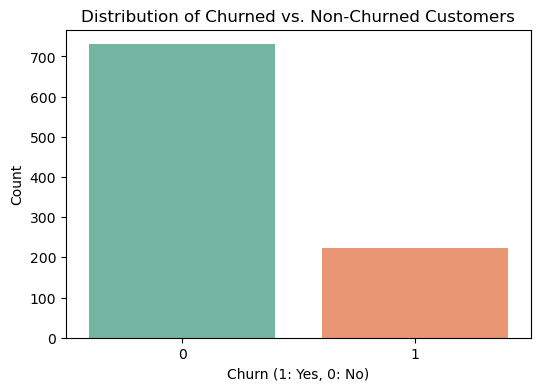

In [33]:
# 1. Distribution of customers who churn vs. those who don’t
def plot_churn_distribution(df):
    plt.figure(figsize=(6,4))
    sns.countplot(x='Target', data=df, palette='Set2')
    plt.title('Distribution of Churned vs. Non-Churned Customers')
    plt.xlabel('Churn (1: Yes, 0: No)')
    plt.ylabel('Count')
    plt.show()

plot_churn_distribution(df)



In [36]:
# Replace inf and -inf with NaN before proceeding
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# After replacing, handle any NaN values if needed
df.fillna(0, inplace=True)  # Example: Replace NaN values with 0 (or handle as per your strategy)

# Continue with the rest of your analysis/visualization


D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


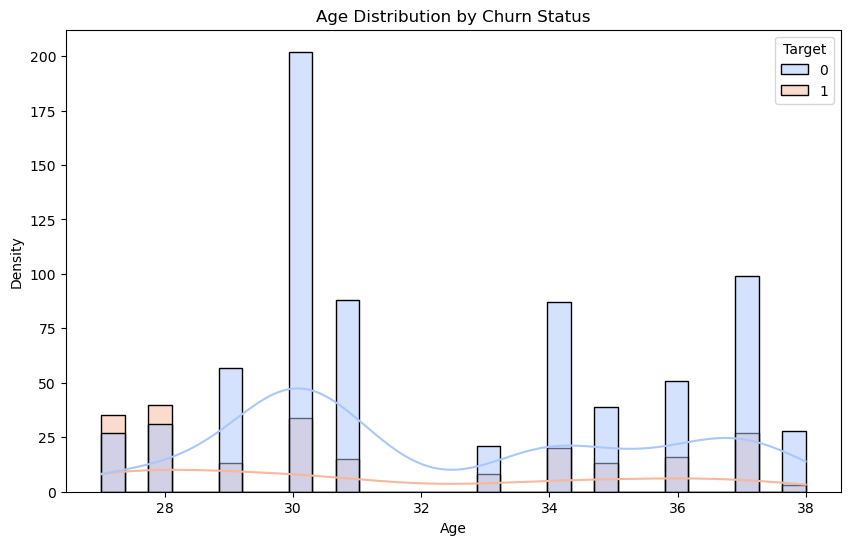

In [37]:
# 2. Age Distribution and Churn Relationship
def plot_age_distribution(df):
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x='Age', hue='Target', kde=True, bins=30, palette='coolwarm')
    plt.title('Age Distribution by Churn Status')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.show()

plot_age_distribution(df)

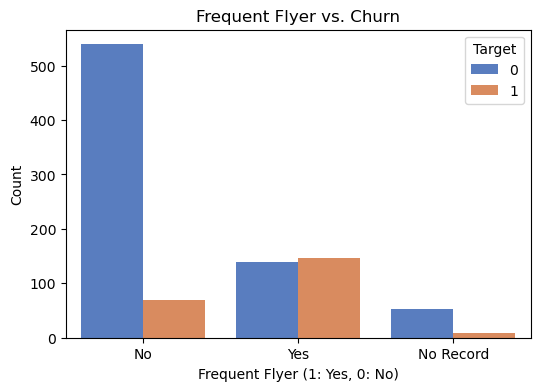

In [38]:
# 3. Frequent Flyer Status and Churn Relationship
df['Target'] = df['Target'].astype(str)

# Plot the Frequent Flyer vs. Churn visualization
def plot_frequent_flyer(df):
    plt.figure(figsize=(6,4))
    sns.countplot(x='FrequentFlyer', hue='Target', data=df, palette='muted')
    plt.title('Frequent Flyer vs. Churn')
    plt.xlabel('Frequent Flyer (1: Yes, 0: No)')
    plt.ylabel('Count')
    plt.show()

# Call the function to plot
plot_frequent_flyer(df)


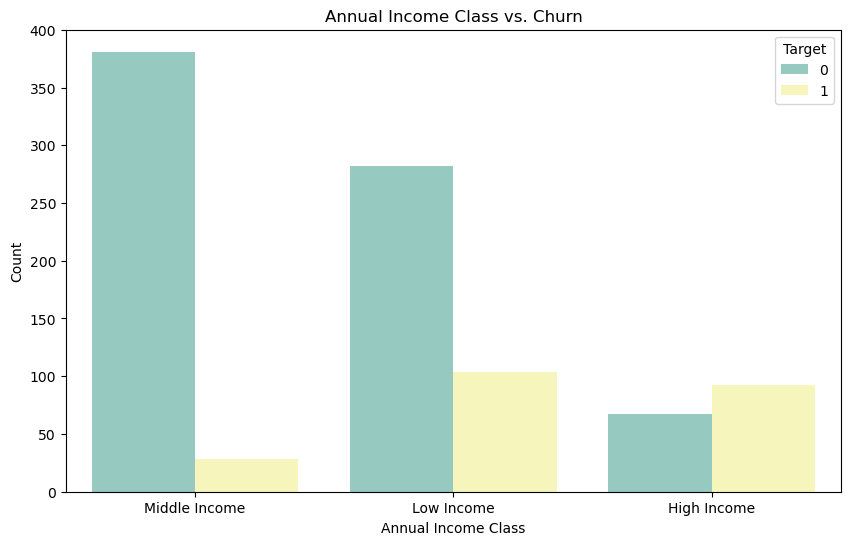

In [39]:
# 4. Annual Income Class and Churn Relationship
def plot_income_vs_churn(df):
    plt.figure(figsize=(10,6))
    sns.countplot(x='AnnualIncomeClass', hue='Target', data=df, palette='Set3')
    plt.title('Annual Income Class vs. Churn')
    plt.xlabel('Annual Income Class')
    plt.ylabel('Count')
    plt.show()

plot_income_vs_churn(df)

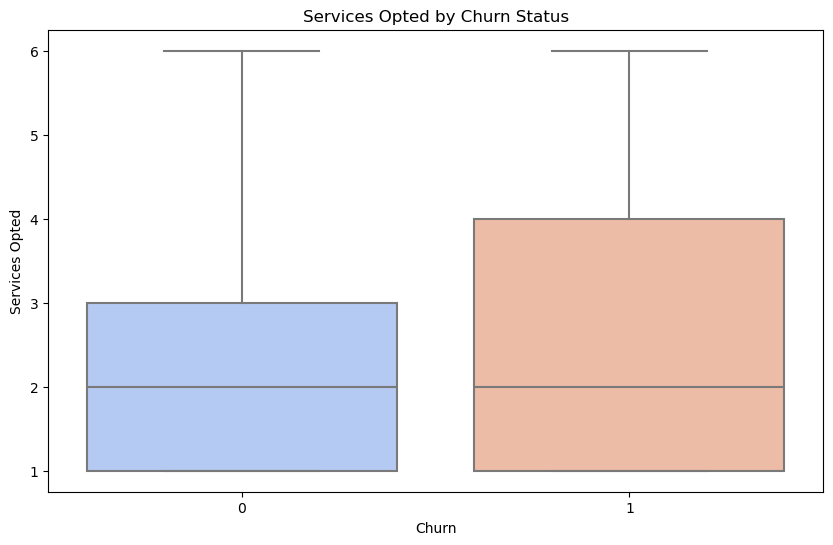

In [40]:
# 5. Services Opted and Churn
def plot_services_opted(df):
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Target', y='ServicesOpted', data=df, palette='coolwarm')
    plt.title('Services Opted by Churn Status')
    plt.xlabel('Churn')
    plt.ylabel('Services Opted')
    plt.show()

plot_services_opted(df)

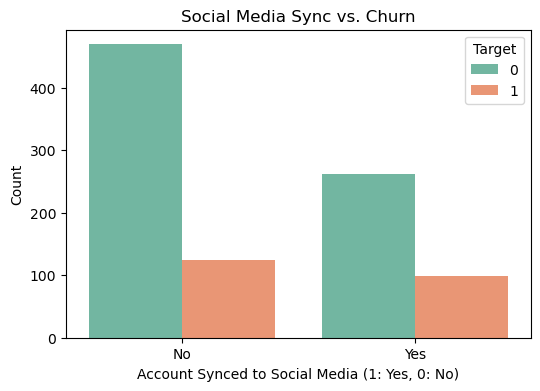

In [41]:
# 6. Social Media Sync and Churn
def plot_social_media_sync(df):
    plt.figure(figsize=(6,4))
    sns.countplot(x='AccountSyncedToSocialMedia', hue='Target', data=df, palette='Set2')
    plt.title('Social Media Sync vs. Churn')
    plt.xlabel('Account Synced to Social Media (1: Yes, 0: No)')
    plt.ylabel('Count')
    plt.show()

plot_social_media_sync(df)

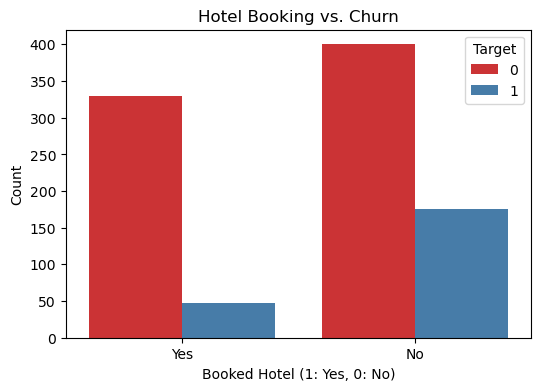

In [42]:
# 7. Hotel Booking and Churn
def plot_hotel_booking(df):
    plt.figure(figsize=(6,4))
    sns.countplot(x='BookedHotelOrNot', hue='Target', data=df, palette='Set1')
    plt.title('Hotel Booking vs. Churn')
    plt.xlabel('Booked Hotel (1: Yes, 0: No)')
    plt.ylabel('Count')
    plt.show()

plot_hotel_booking(df)


Data Types After Conversion:
AnnualIncomeClass             int64
FrequentFlyer                 int64
AccountSyncedToSocialMedia    int64
BookedHotelOrNot              int64
Target                        int32
dtype: object


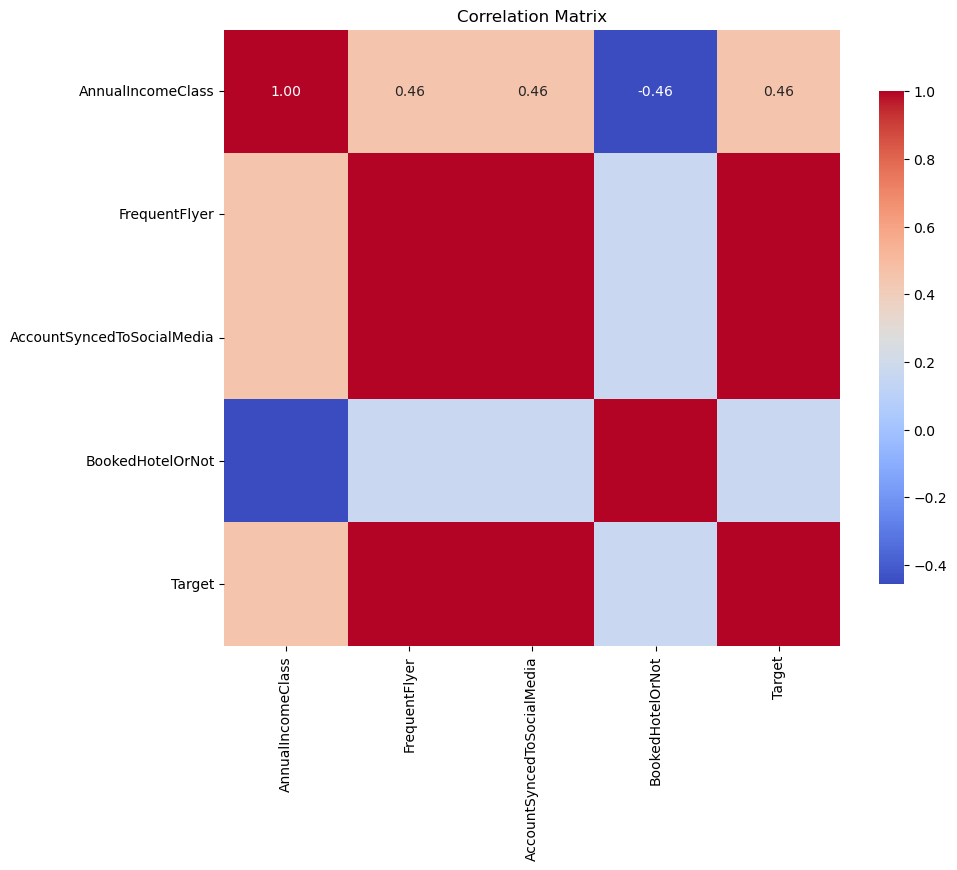

In [48]:

# 8. Correlation Matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration (replace this with your actual DataFrame)
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your data

# Sample DataFrame structure (you may already have this)
data = {
    'AnnualIncomeClass': ['Low Income', 'Middle Income', 'High Income', 'Low Income', 'High Income'],
    'FrequentFlyer': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'AccountSyncedToSocialMedia': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'BookedHotelOrNot': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'Target': [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Map 'AnnualIncomeClass' to numeric values
income_mapping = {'Low Income': 1, 'Middle Income': 2, 'High Income': 3}
df['AnnualIncomeClass'] = df['AnnualIncomeClass'].map(income_mapping)

# Ensure other categorical columns are numeric
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].map({'Yes': 1, 'No': 0})
df['BookedHotelOrNot'] = df['BookedHotelOrNot'].map({'Yes': 1, 'No': 0})

# Check if the Target is already numeric (you can skip this if you know it is)
df['Target'] = df['Target'].astype(int)

# Check for any remaining non-numeric columns
print("Data Types After Conversion:")
print(df.dtypes)

# Now you can calculate the correlation matrix
def plot_correlation_matrix(df):
    plt.figure(figsize=(10,8))
    
    # Compute the correlation matrix only on numeric columns
    corr_matrix = df.corr()
    
    # Plot the heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix')
    plt.show()

# Call the function to plot
plot_correlation_matrix(df)





DataFrame Columns:
Index(['AnnualIncomeClass', 'FrequentFlyer', 'AccountSyncedToSocialMedia',
       'BookedHotelOrNot', 'Target', 'Age', 'ServicesOpted'],
      dtype='object')


D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

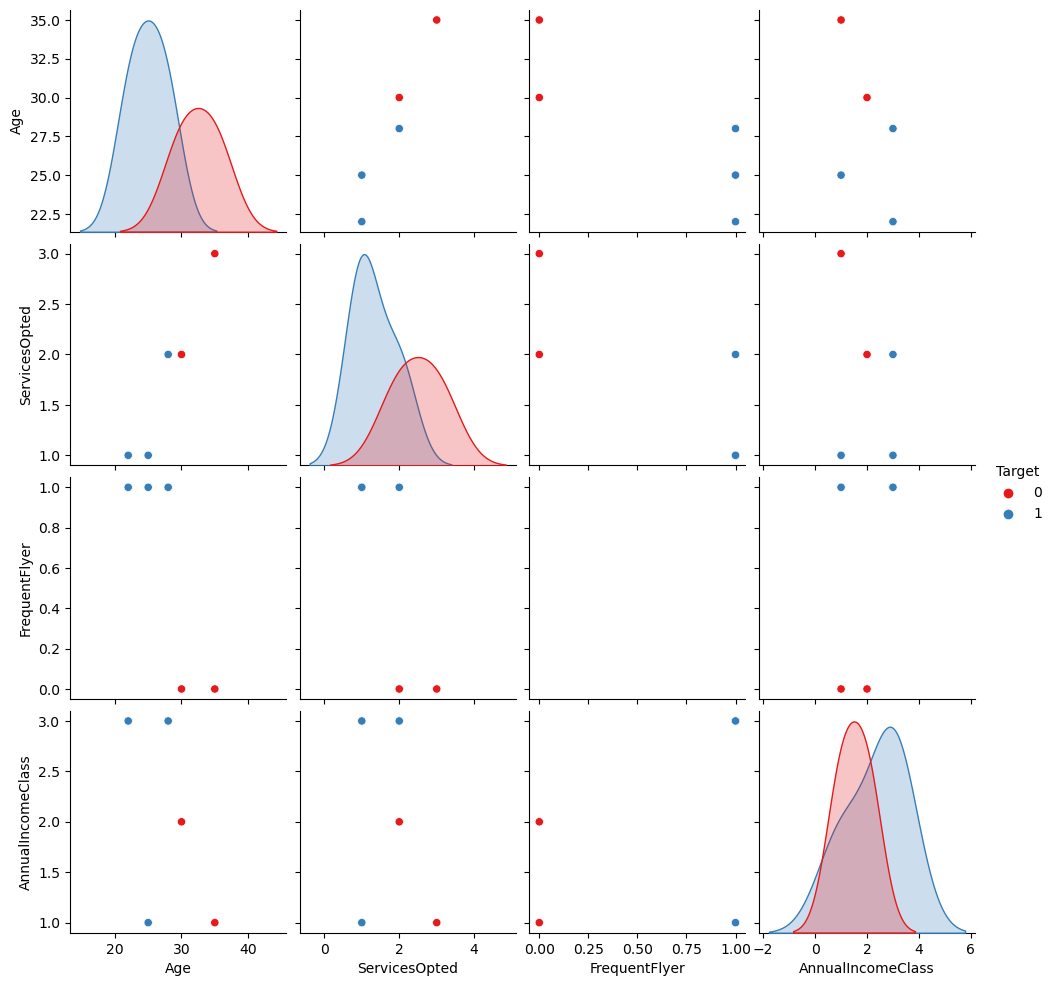

In [50]:
# 9. Pairplot of Features

# Example DataFrame for demonstration
data = {
    'AnnualIncomeClass': [1, 2, 3, 1, 3],
    'FrequentFlyer': [1, 0, 1, 0, 1],
    'AccountSyncedToSocialMedia': [1, 0, 1, 0, 1],
    'BookedHotelOrNot': [1, 0, 1, 1, 0],
    'Target': [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Ensure to have the Age and ServicesOpted columns (add them if necessary)
# Here we're adding them for the purpose of this example
df['Age'] = [25, 30, 22, 35, 28]
df['ServicesOpted'] = [1, 2, 1, 3, 2]

# Print out the DataFrame columns to debug
print("DataFrame Columns:")
print(df.columns)

# Function to plot pairplot
def plot_pairplot(df):
    # Ensure the columns exist in the DataFrame
    required_columns = ['Age', 'ServicesOpted', 'FrequentFlyer', 'AnnualIncomeClass', 'Target']
    for col in required_columns:
        if col not in df.columns:
            print(f"Warning: '{col}' is not in the DataFrame.")
            return
            
    sns.pairplot(df[required_columns], hue='Target', palette='Set1')
    plt.show()

# Call the function to plot
plot_pairplot(df)


D:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


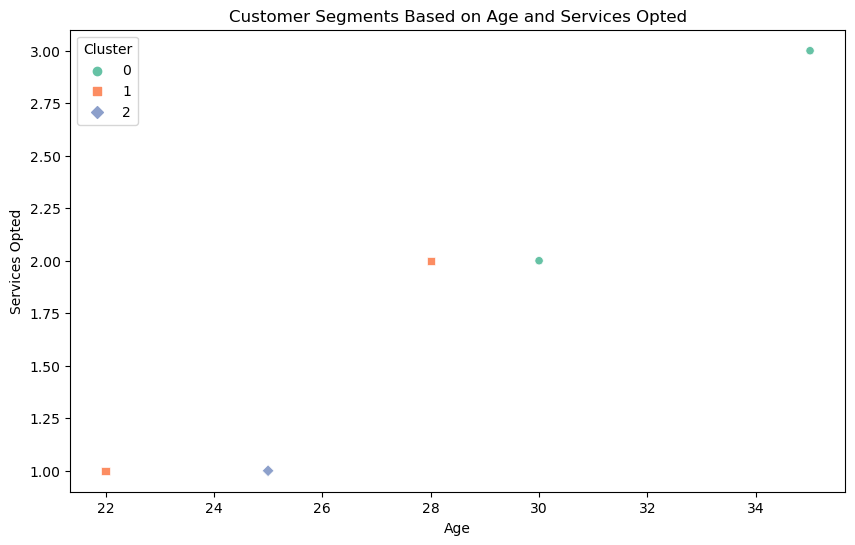

In [52]:
# 10. Clustering for Customer Segmentation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "1"

def customer_segmentation(df):
    # Select relevant features for clustering
    X = df[['Age', 'ServicesOpted', 'AnnualIncomeClass', 'FrequentFlyer']]
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply KMeans Clustering with explicit n_init value
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='ServicesOpted', hue='Cluster', data=df, palette='Set2', style='Cluster', markers=["o", "s", "D"])
    plt.title('Customer Segments Based on Age and Services Opted')
    plt.xlabel('Age')
    plt.ylabel('Services Opted')
    plt.legend(title='Cluster')
    plt.show()

# Run the customer segmentation function
customer_segmentation(df)
